## Business Overview
---

### Introduction

Real estate is one of the most important sectors of any economy. Understanding the key drivers of housing prices can provide valuable insights for both buyers and sellers in the market. In this project, we analyze a data set of house sales in a northwestern county to identify the factors that influence housing prices in the area.

## Business Understanding
The real estate agency helps homeowners buy and/or sell homes. One of the key services they provide is advice to homeowners about how home renovations can increase the estimated value of their homes. The agency is interested in developing a model that can predict the estimated value of a home after renovations, based on the type and cost of the renovations.


### Business Problem
The real estate agency needs to provide accurate advice to homeowners about how home renovations can increase the estimated value of their homes, and by what amount. However, the agency currently lacks a reliable method for predicting the impact of specific home renovations on home value. As a result, the agency is unable to provide accurate advice to homeowners about the potential return on investment for different renovation projects.

However,
Identifying the features that influence pricing can help the agency understand which factors are most important in determining the value of a home, and can guide their advice to homeowners about which renovations might increase the value of their homes.

Analyzing trends in house prices over time and predicting future prices can help the agency make informed decisions about when to buy or sell properties and can also be used to provide advice to homeowners about when might be the best time to sell their homes.

Identifying undervalued properties and recommending better prices can help the agency maximize their profits by ensuring that they are buying properties at the best possible price and selling them at a fair market value.

---
### Data Understanding

The relevant dataset used in this project is the [kc_house_data](https://github.com/dorinelangat/dsc-phase-2-project-v2-3/tree/main/data), found in the data folder of this repository.

The dataset contains information on sale prices for houses, property sizes, location, and the years of construction and renovation alongside other relavant information.


In [89]:
# Loading the libraries

# data
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
import warnings

# modeling
import statsmodels.api as sm 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# statistics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error

# styling
plt.style.use('seaborn')
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

In [90]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


* function for understanding our Data

In [91]:
def explore_data(df):
    '''
    Print some basic statistics and information about the DataFrame
    '''
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    print("Data types:\n", df.dtypes)
    print("info:\n", df.info())
    print("columns:", df.columns)
    print("Head:\n", df.head())
    print("Tail:\n", df.tail())
    print("statistical summary:\n", df.describe())
    print("Missing values:\n", df.isnull().sum())
    print("duplicated values:\n", df.duplicated)
    #the correlation of other features with the price
    print("correlation with the price:\n", df.corr()['price'])
    print("condition column:\n", df['condition'].value_counts())
    print("grade column:\n", df['grade'].value_counts())
    print("view column:\n", df['view'].value_counts())

In [92]:
explore_data(data)

Number of rows: 21597
Number of columns: 21
Data types:
 id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-n

* Column info

In [93]:
cols = pd.read_csv("data/column_names.md", sep='|')
cols

,# Column Names and Descriptions for King County Data Set
0,* `id` - Unique identifier for a house
1,* `date` - Date house was sold
2,* `price` - Sale price (prediction target)
3,* `bedrooms` - Number of bedrooms
4,* `bathrooms` - Number of bathrooms
5,* `sqft_living` - Square footage of living spa...
6,* `sqft_lot` - Square footage of the lot
7,* `floors` - Number of floors (levels) in house
8,* `waterfront` - Whether the house is on a wat...
9,"* Includes Duwamish, Elliott Bay, Puget Soun..."


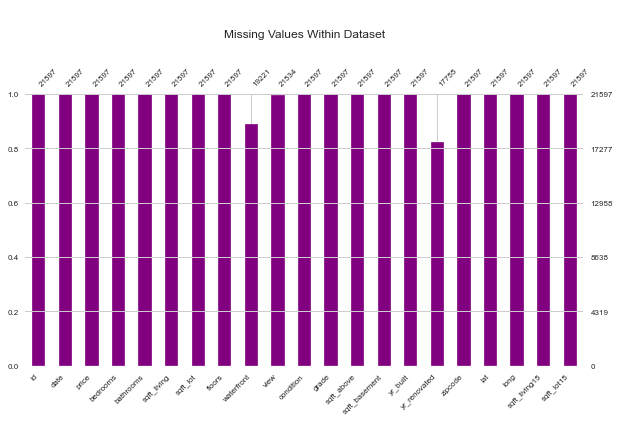

In [94]:
# Visualise the missing values in the dataset
msno.bar(data, color='purple', figsize=(10, 5), fontsize=8)
plt.title("""

Missing Values Within Dataset

""");

Based on the barplot above, we can see that there are missing values in the columns: <I> waterfront, view</i> and  <i>the year renovated</i> with 2376, 63 and 3842 missing values, respectively.

---

# Data cleaning

* function for cleaning the dataset

In [95]:
def clean_data(df):
    '''
    Clean data by removing missing values and duplicates
    '''
    

    # Remove duplicates
    df.drop_duplicates(inplace=True)

    # Replace "?" and " " values with NaN
    df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan).replace('', np.nan)

    # Convert the column to float data type
    df['sqft_basement'] = df['sqft_basement'].astype(float)

    # Convert the 'date' column to a datetime data type
    df['date'] = pd.to_datetime(df['date'])

    #Converting the 'waterfront' column to a binary variable where 1 represents 'YES' and 0 represents 'NO'
    df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)

    #Convert the 'condition' and 'grade' columns to ordinal variables
    conditions = {'Poor': 1, 'Average': 2, 'Fair': 3, 'Good': 4, 'Very Good': 5, 'Excellent': 6}
    df['condition'] = df['condition'].map(conditions)

    grades = {'3 Poor': 1,'4 Low': 2,'5 Fair' : 3, '6 Low Average': 4, '7 Average': 5, '8 Good': 6, '9 Better': 7, '10 Very Good' : 8, '11 Excellent': 8, '12 Luxury': 9, '13 Mansion': 10}
    df['grade'] = df['grade'].map(grades)

    # Remove missing values
    df.dropna(inplace=True)

    return df

In [96]:
clean_data(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,5,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,5,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,5,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,6,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,NONE,...,8,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,6,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,6,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,5,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,6,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


#   There is a house with 33 bedrooms
*  which is the highest selling house type which enables the realstate to sell a house based on that.
* which is the most common house bedroomwise

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

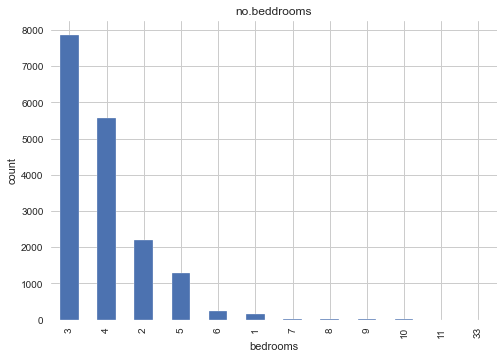

In [97]:
data["bedrooms"].value_counts().plot(kind="bar")
plt.title("no.beddrooms")
plt.ylabel("count")
plt.xlabel("bedrooms")
sns.despine

* As we can see from the visualization 3 bedroom houses are most commonly sold followed by 4 bedroom. So how is it useful ? For a builder having this data , He can make a new building with more 3 and 4 bedroom’s to attract more buyers.

Find out the location where the highest selling houses are
* using the latitude and the longitude on the dataset for each house. We are going to see the common location and how the houses are placed.

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

<Figure size 720x720 with 0 Axes>

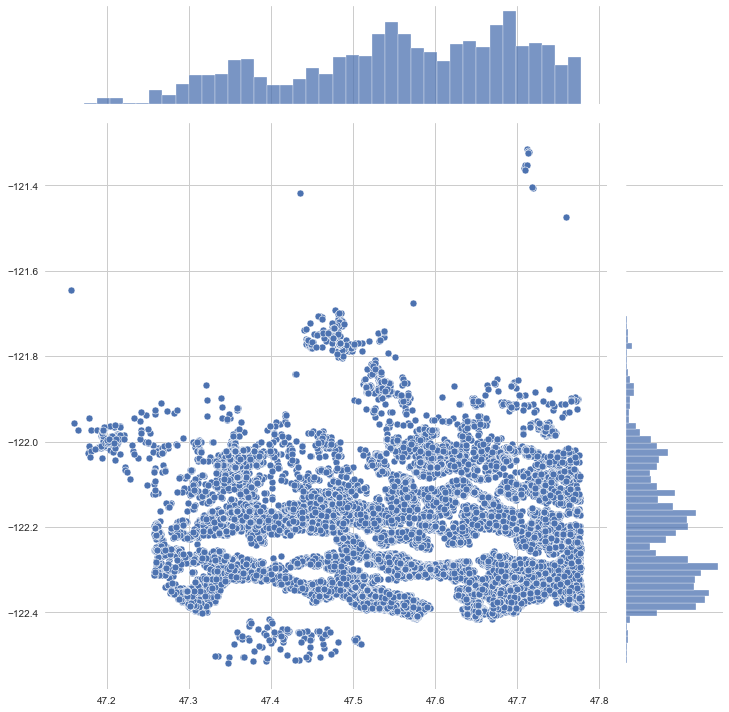

In [98]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values,y=data.long.values,size =10)
plt.ylabel("longitude",fontsize=12)
plt.xlabel("latitude",fontsize=12)
plt.show;
sns.despine

#  interpretation
* joinplot function helps us see the concentration of data and placement of data and can be really useful.
*  For latitude between -47.7 and -48.8 there are many houses , which would mean that maybe it’s an ideal location isn’t it ? But when we talk about longitude we can see that concentration is high between -122.2 to -122.4. Which would mean that most of the buy’s has been for this particular location.

---

# Data Analysis


# univariate Analysis
*  functions to visualize data in the categorical columns

In [99]:
#Selecting categorical columns
data.select_dtypes("object")

,view
0,NONE
1,NONE
3,NONE
4,NONE
5,NONE
...,...
21592,NONE
21593,NONE
21594,NONE
21595,NONE


In [100]:
def get_value_counts(df, col):
    ''' Returns the value counts of a column in a dataframe '''
    counts = df[col].value_counts(dropna=False)
    return counts

# Function to visualise the the data in the columns
def plot_data(df, col, title):
    ''' Plots the value counts of a column in a dataframe as a bar chart '''
    get_value_counts(df, col).plot(kind='bar', figsize=(10, 5), color='lightgreen', edgecolor='black')
    plt.title(title)
    plt.xticks(rotation=0);

# 1. Waterfront

0    17224
1      116
Name: waterfront, dtype: int64


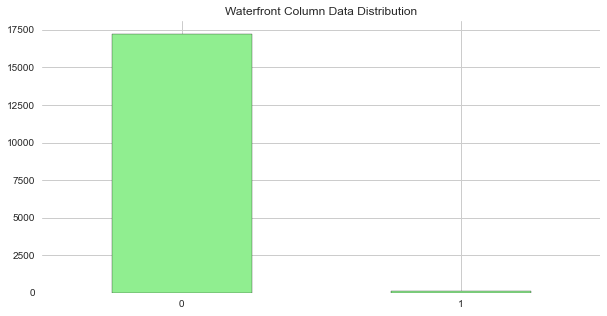

In [101]:
# Identify the unique values (and counts) in the 'waterfront' column
print(get_value_counts(data, 'waterfront'))

# Visualise the data distribution
plot_data(data, 'waterfront', 'Waterfront Column Data Distribution')    

* The distribution above shows that most of the houses in the dataset are not on a waterfront

# 2. condition

2    11262
4     4530
5     1386
3      140
1       22
Name: condition, dtype: int64


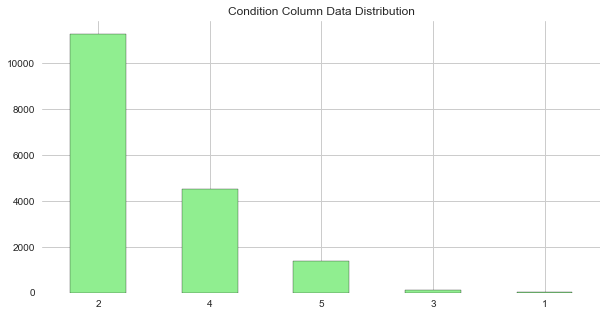

In [102]:
# Identify the unique values (and counts) in the 'condition' column
print(get_value_counts(data, 'condition'))

# Visualise the data distribution
plot_data(data, 'condition', 'Condition Column Data Distribution')

* From the distribution above, we can see that most of the houses in the dataset are in average condition.

# 3. View

NONE         15649
AVERAGE        770
GOOD           393
FAIR           274
EXCELLENT      254
Name: view, dtype: int64


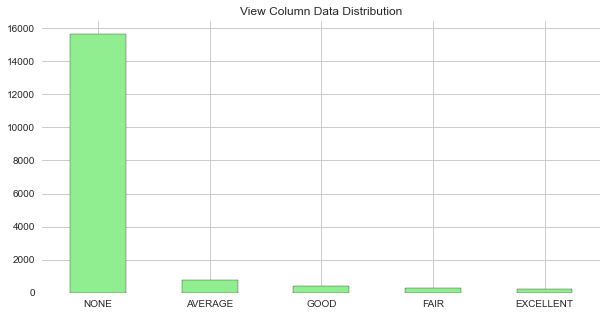

In [103]:
# Identify the unique values (and counts) in the 'view' column
print(get_value_counts(data, 'view'))

# Visualise the data distribution
plot_data(data, 'view', 'View Column Data Distribution')

* In the distribution above, we see that majority of the houses in the dataset have a no view.

# 4. Grade

5     7193
6     4869
7     2117
4     1642
8     1234
3      184
9       71
2       18
10      11
1        1
Name: grade, dtype: int64


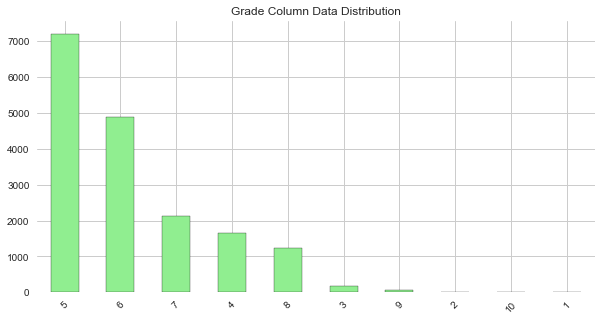

In [104]:
# Identify the unique values (and counts) in the 'grade' column
print(get_value_counts(data, 'grade'))

# Visualise the data distribution
plot_data(data, 'grade', 'Grade Column Data Distribution')
plt.xticks(rotation=45);

# 5. Zipcode

98038    479
98103    468
98052    459
98042    458
98115    447
        ... 
98010     80
98102     73
98024     63
98148     45
98039     39
Name: zipcode, Length: 70, dtype: int64


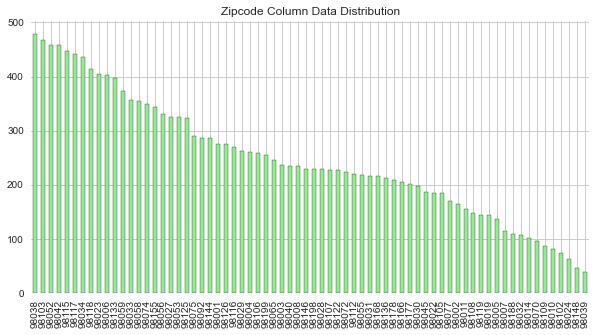

In [105]:
# Identify the unique values (and counts) in the 'zipcode' column
print(get_value_counts(data, 'zipcode'))

# Visualise the data distribution
plot_data(data, 'zipcode', 'Zipcode Column Data Distribution')
plt.xticks(rotation=90);

* From the distribution above, we see that the zipcode with the most houses is 98103. The zipcode with the least houses is 98039. Unlike the other categorical columns, we see more evenly distributed data in this column. There is no missing data in this column.

# Functions for numerical columns

In [106]:
data.select_dtypes("number").sum()# finding tne numerical columns

id               7.954543e+13
price            9.374368e+09
bedrooms         5.856900e+04
bathrooms        3.678100e+04
sqft_living      3.614989e+07
sqft_lot         2.649397e+08
floors           2.593000e+04
waterfront       1.160000e+02
condition        4.801600e+04
grade            9.777600e+04
sqft_above       3.108042e+07
sqft_basement    5.069466e+06
yr_built         3.417941e+07
yr_renovated     1.441152e+06
zipcode          1.700667e+09
lat              8.246822e+05
long            -2.119180e+06
sqft_living15    3.451350e+07
sqft_lot15       2.223497e+08
dtype: float64

In [107]:
def describe_data(df, col):
    ''' Returns the statistics of a column in a dataframe '''
    print(df[col].describe())

# Function to plot the histogram, kde and boxplot of the data
def plot_distribution(df, col, title, bins_=10):
    ''' Plots the distribution of a column in a dataframe as a histogram, kde and boxplot '''
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    
    # assign a graph to each ax
    sns.boxplot(df[col], ax=ax_box, color='lightgreen')
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='lightgreen', bins=bins_, edgecolor='black')
    plt.suptitle(title)
    plt.tight_layout();

In [126]:
def plot_numerical_features(df):
    # get the list of numerical columns
    num_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()

    # set the figure size and create subplots with shared y axis
    fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5), sharey=True)

    # loop through each numerical column and create a histogram
    for i, col in enumerate(num_cols):
        df[col].plot.hist(ax=axes[i])
        axes[i].set_title(col)
        # add some padding to the left of the chart
        axes[i].margins(x=0.1)
        # add some space between the subplots
        plt.subplots_adjust(wspace=0.5)
plt.show()

ValueError: autodetected range of [-inf, 0.47588499532711054] is not finite

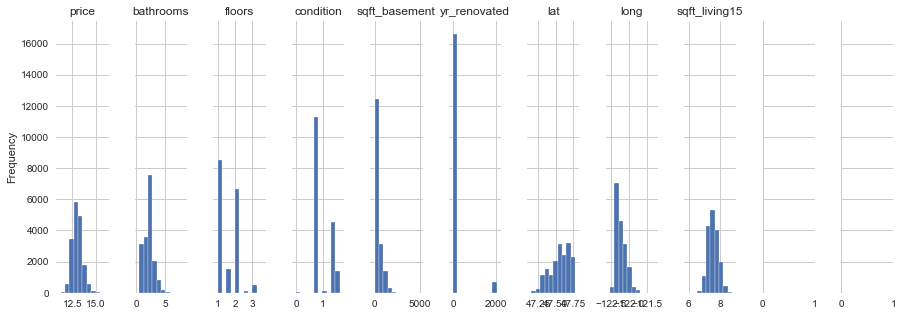

In [127]:
plot_numerical_features(data)

 # 1. price

count    1.734000e+04
mean     5.406210e+05
std      3.684592e+05
min      8.000000e+04
25%      3.215000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


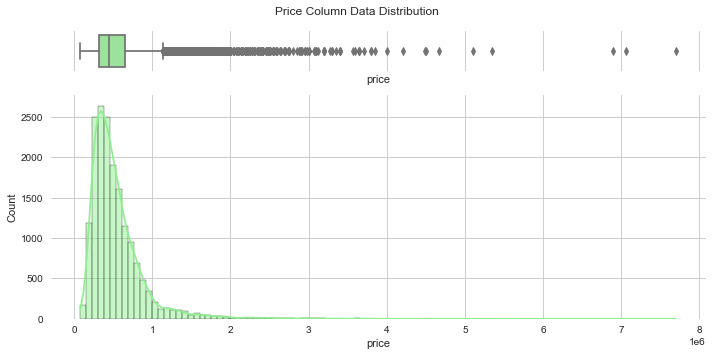

In [108]:
# Describe the 'price' column
describe_data(data, 'price')

# Visualise the data distribution
plot_distribution(data, 'price', 'Price Column Data Distribution', 100)

From the distribution above, we see that the price column is skewed to the right

# 2. Bedrooms

count    17340.000000
mean         3.377682
std          0.931706
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


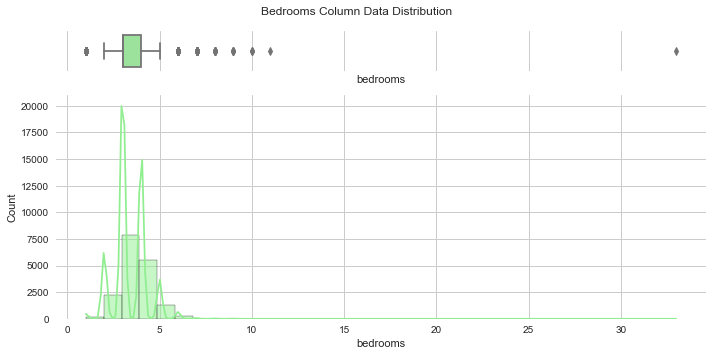

In [109]:
describe_data(data, 'bedrooms')

# Visualise the data distribution
plot_distribution(data, 'bedrooms', 'Bedrooms Column Data Distribution',33)

From the visualization the bedrooms are normally distributed.

the mean number of bedrooms is 3.3

# 3.Bathrooms

count    17340.000000
mean         3.377682
std          0.931706
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


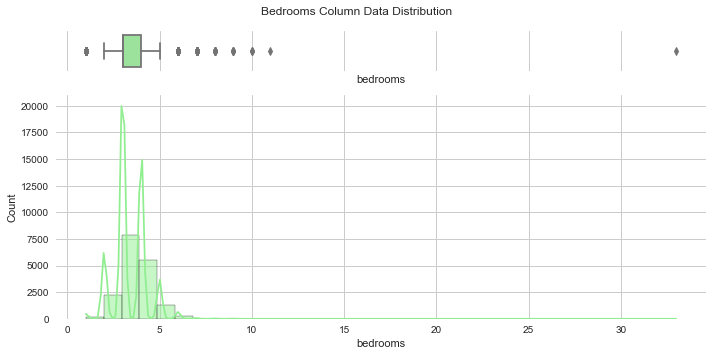

In [110]:
describe_data(data, 'bedrooms')

# Visualise the data distribution
plot_distribution(data, 'bedrooms', 'Bedrooms Column Data Distribution',33)

Like the bedroom,Bathrooms form a normal distribution in the dataset with the mean number of bathroom being 3.37

# 4. Sqft_living

count    17340.000000
mean      2084.768743
std        917.698694
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


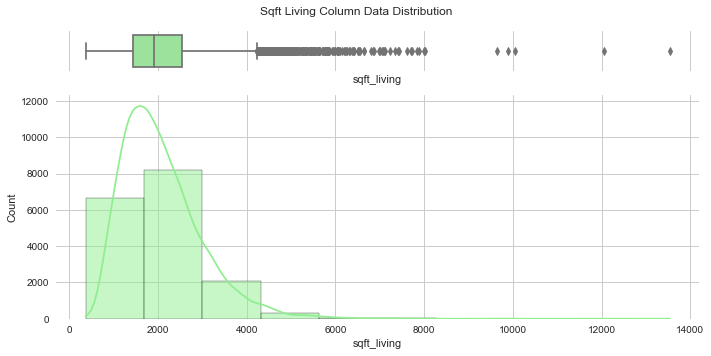

In [111]:
# Describe the 'sqft_living' column
describe_data(data, 'sqft_living')

# Visualise the data distribution
plot_distribution(data, 'sqft_living', 'Sqft Living Column Data Distribution')


From the distribution above, we can see that the sqft living column is skewed to the right. This means that the mean square footage of the homes is greater than the median. 

# 5. year built

count    17340.000000
mean      1971.130681
std         29.312138
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64


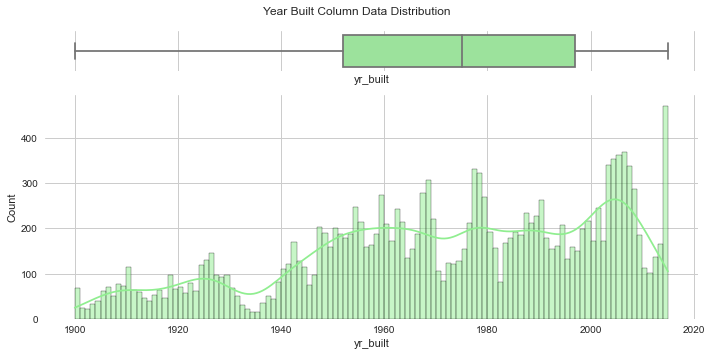

In [112]:
# Describe the 'yr_built' column
describe_data(data, 'yr_built')

# Visualise the data distribution
plot_distribution(data, 'yr_built', 'Year Built Column Data Distribution', 115)

 The oldest house in the dataset was built in 1900, and the newest house in the dataset was built in around 2015. The mean year the houses in the dataset were built is 1971, and the median year the houses in the dataset were built is 1975. 

# 6. Sqft living 15

count    17340.000000
mean      1990.397693
std        685.542943
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2370.000000
max       6210.000000
Name: sqft_living15, dtype: float64


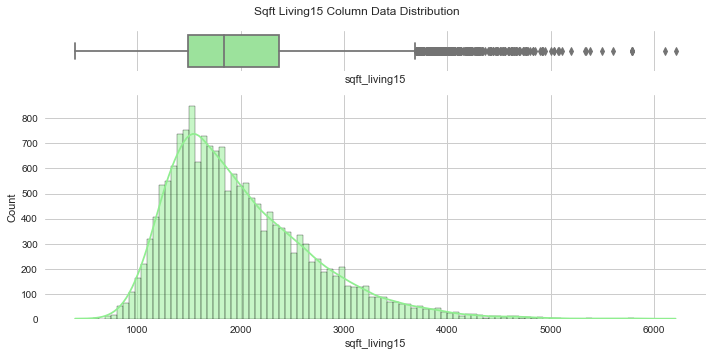

In [113]:
#The square footage of the land lots of the nearest 15 neighbors
# Describe the 'sqft_living15' column
describe_data(data, 'sqft_living15')

# Visualise the data distribution
plot_distribution(data, 'sqft_living15', 'Sqft Living15 Column Data Distribution', 100) 

From the distributions above, we can see that the data is skewed to the right. This is as a result of the mean being greater than the median

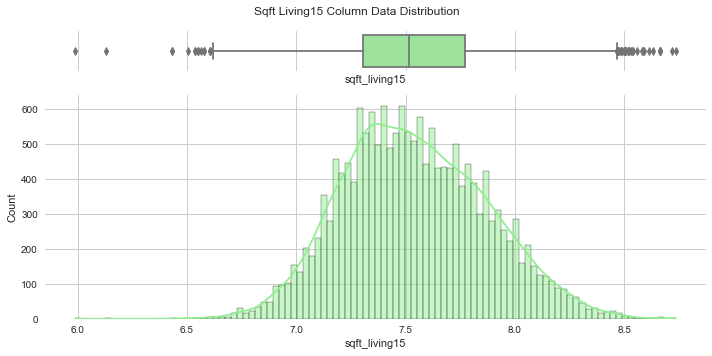

In [114]:
def log_transform(df, column):# performing a log transformation
    '''
    Perform log transformation on a given column in a dataframe
    '''
    df[column] = np.log(df[column])

    return df
log_transform(data,["sqft_living15"])
plot_distribution(data, 'sqft_living15', 'Sqft Living15 Column Data Distribution', 100) #plotting a graph on the transformed clolumn

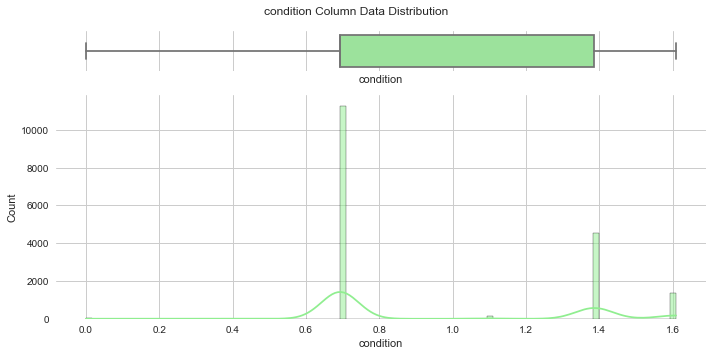

In [115]:
log_transform(data,"condition")#transformation on the condition column
plot_distribution(data, 'condition', 'condition Column Data Distribution', 100)#plotting the transformed column


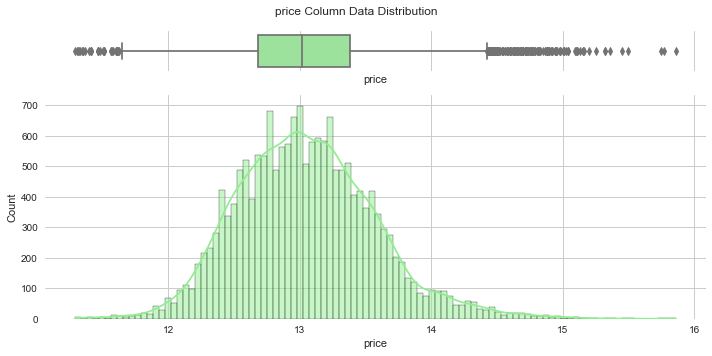

In [116]:
log_transform(data,["price"])#transformation in the  price column
plot_distribution(data, 'price', 'price Column Data Distribution', 100)

In [117]:
def log_transform(data, column_name):
    return np.log(data[column_name])

---

In [118]:
log_transform(data,"condition")

0       -0.366513
1       -0.366513
3        0.475885
4       -0.366513
5       -0.366513
           ...   
21592   -0.366513
21593   -0.366513
21594   -0.366513
21595   -0.366513
21596   -0.366513
Name: condition, Length: 17340, dtype: float64

In [119]:
log_transform(data,"sqft_living15")

0        1.974140
1        2.005860
3        1.976195
4        2.014308
5        2.136295
           ...   
21592    1.992388
21593    2.016511
21594    1.935507
21595    1.981187
21596    1.935507
Name: sqft_living15, Length: 17340, dtype: float64

--


In [120]:
def log_transform(x):
    return np.log(x)

In [121]:
condition_log = log_transform(data["condition"])

In [122]:
sqft_15_log = log_transform(data["sqft_living15"])

In [123]:

# apply the logarithmic transformation to the "condition" and "sqft_living15" columns
data["condition_log"] = data["condition"].apply(log_transform)
data["sqft_living15_log"] = data["sqft_living15"].apply(log_transform)

# define the features and target variable
X = data[["condition_log", "sqft_living15_log"]]
y = data["price"]

# add a constant term to the features
X = sm.add_constant(X)

# fit the linear regression model
model = sm.OLS(y, X).fit()

# print the summary statistics of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 20 Apr 2023   Prob (F-statistic):                nan
Time:                        20:34:14   Log-Likelihood:                    nan
No. Observations:               17340   AIC:                               nan
Df Residuals:                   17340   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                    nan        na

In [ ]:
#logarithimic transformation on the data
def log_transform(df):
    '''
    Perform log transformation on a given column in a dataframe
    '''
    print(data['bedrooms'] == np.log(data['bedrooms'] + 1))
    print(data['sqft_living15'] == np.log(data['sqft_living15'] + 1))
    print(data['grade'] == np.log(data['grade'] + 1))
    print(data['condition'] == np.log(data['condition'] + 1))
    print(data['yr_built'] == np.log(data['yr_built'] + 1))
    
   

In [ ]:
log_transform(data)

0        False
1        False
3        False
4        False
5        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: bedrooms, Length: 17340, dtype: bool
0        False
1        False
3        False
4        False
5        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: sqft_living15, Length: 17340, dtype: bool
0        False
1        False
3        False
4        False
5        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: grade, Length: 17340, dtype: bool
0        False
1        False
3        False
4        False
5        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: condition, Length: 17340, dtype: bool
0        False
1        False
3        False
4        False
5        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False


In [ ]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,12.309982,3,1.00,1180,5650,1.0,0,NONE,...,5,1180,0.0,1955,0.0,98178,47.5112,-122.257,7.200425,5650
1,6414100192,2014-12-09,13.195614,3,2.25,2570,7242,2.0,0,NONE,...,5,2170,400.0,1951,1991.0,98125,47.7210,-122.319,7.432484,7639
3,2487200875,2014-12-09,13.311329,4,3.00,1960,5000,1.0,0,NONE,...,5,1050,910.0,1965,0.0,98136,47.5208,-122.393,7.215240,5000
4,1954400510,2015-02-18,13.142166,3,2.00,1680,8080,1.0,0,NONE,...,6,1680,0.0,1987,0.0,98074,47.6168,-122.045,7.495542,7503
5,7237550310,2014-05-12,14.022525,4,4.50,5420,101930,1.0,0,NONE,...,8,3890,1530.0,2001,0.0,98053,47.6561,-122.005,8.468003,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,12.793859,3,2.50,1530,1131,3.0,0,NONE,...,6,1530,0.0,2009,0.0,98103,47.6993,-122.346,7.333023,1509
21593,6600060120,2015-02-23,12.899220,4,2.50,2310,5813,2.0,0,NONE,...,6,2310,0.0,2014,0.0,98146,47.5107,-122.362,7.512071,7200
21594,1523300141,2014-06-23,12.904459,2,0.75,1020,1350,2.0,0,NONE,...,5,1020,0.0,2009,0.0,98144,47.5944,-122.299,6.927558,2007
21595,291310100,2015-01-16,12.899220,3,2.50,1600,2388,2.0,0,NONE,...,6,1600,0.0,2004,0.0,98027,47.5345,-122.069,7.251345,1287


In [ ]:
plot_distribution(data, 'np.log(data['sqft_living15'] + ', 'Sqft Living15 Column Data Distribution', 100) 

SyntaxError: invalid syntax (<ipython-input-35-e2a3ac305e6b>, line 1)

In [ ]:
y = data['price']
X_iog_baseline = data[['sqft_living']]
log_baseline_model = sm.OLS(y, sm.add_constant(X_iog_baseline))
log_baseline_results = log_baseline_model.fit()
print(log_baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.699e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:53:46   Log-Likelihood:            -2.4093e+05
No. Observations:               17340   AIC:                         4.819e+05
Df Residuals:                   17338   BIC:                         4.819e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.825e+04   4936.020     -9.776      

In [ ]:
y= data["price"]
Xlog= data[["bedrooms","yr_built","sqft_living","grade","condition","floors","waterfront","sqft_lot","bathrooms"]]
log_model=sm.OLS(y,sm.add_constant(Xlog)).fit()
print(log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     3334.
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:53:47   Log-Likelihood:            -2.3814e+05
No. Observations:               17340   AIC:                         4.763e+05
Df Residuals:                   17330   BIC:                         4.764e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.064e+06   1.48e+05     47.780      

In [ ]:
def log_transform(df, column):
    '''
    Perform log transformation on a given column in a dataframe
    '''
    df[column] = np.log(df[column])

    return df

In [ ]:
data.corr()['price']


id              -0.017224
price            1.000000
bedrooms         0.306837
bathrooms        0.524719
sqft_living      0.703520
sqft_lot         0.086720
floors           0.256500
waterfront       0.263387
condition        0.009526
grade            0.638382
sqft_above       0.608209
sqft_basement    0.321079
yr_built         0.051421
yr_renovated     0.128517
zipcode         -0.052491
lat              0.307635
long             0.021837
sqft_living15    0.586046
sqft_lot15       0.082925
Name: price, dtype: float64

## Data Cleaning and Preparation

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
duplicates = data[data.duplicated(['id'], keep=False)]
duplicates


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,NONE,...,6,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,NONE,...,6,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0,GOOD,...,8,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,GOOD,...,8,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,NONE,...,4,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20597,2724049222,2014-12-01,220000.0,2,2.50,1000,1092,2.0,0,NONE,...,5,990,10.0,2004,0.0,98118,47.5419,-122.271,1330,1466
20653,8564860270,2014-07-08,449990.0,4,2.50,2680,5539,2.0,0,NONE,...,6,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,NONE,...,6,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,NONE,...,5,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598


The ids are duplicated because the same house was sold multiple times. Therefore, we shall be keeping the records.

In [ ]:
# Replace "?" and " " values with NaN
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan).replace('', np.nan)

# Convert the column to float data type
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [ ]:
# Converting data to appropriate data types

# Convert the 'date' column to a datetime data type
data['date'] = pd.to_datetime(data['date'])

#The data types of the columns
print(data.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                     object
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


In [ ]:
data_1 = data.copy()

In [ ]:
#Converting the 'waterfront' column to a binary variable where 1 represents 'YES' and 0 represents 'NO'
#can also fill the NaN values with 0
data_1['waterfront'] = data_1['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
data_1['waterfront'] = data_1['waterfront'].fillna(0)

In [ ]:
#Fill in the NaN values in the 'yr_renovated' column with the median value of the column
data_1['yr_renovated'] = data['yr_renovated'].fillna(data_1['yr_renovated'].median())

In [ ]:
#Convert the 'condition' and 'grade' columns to ordinal variables
conditions = {'Poor': 1, 'Average': 2, 'Fair': 3, 'Good': 4, 'Very Good': 5, 'Excellent': 6}
data_1['condition'] = data_1['condition'].map(conditions)

grades = {'3 Poor': 1,'4 Low': 2,'5 Fair' : 3, '6 Low Average': 4, '7 Average': 5, '8 Good': 6, '9 Better': 7, '10 Very Good' : 8, '11 Excellent': 8, '12 Luxury': 9, '13 Mansion': 10}
data_1['grade'] = data_1['grade'].map(grades)

In [ ]:
data_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,NaN,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,NaN,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,NaN,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,NaN,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,NONE,...,NaN,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,NaN,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,NaN,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,NaN,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,NaN,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [ ]:
# Replace "?" and " " values with NaN
data_1['sqft_basement'] = data_1['sqft_basement'].replace('?', np.nan).replace('', np.nan)

# Convert the column to float data type
data_1['sqft_basement'] = data_1['sqft_basement'].astype(float)

In [ ]:
# Converting data to appropriate data types

# Convert the 'date' column to a datetime data type
data_1['date'] = pd.to_datetime(data['date'])

#The data types of the columns
print(data_1.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                     object
condition               float64
grade                   float64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


# Identifying features influencing the pricing.

In [ ]:
y = data['price']
X_baseline = data[['sqft_living']]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 1.699e+04
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:53:51   Log-Likelihood:            -2.4093e+05
No. Observations:               17340   AIC:                         4.819e+05
Df Residuals:                   17338   BIC:                         4.819e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.825e+04   4936.020     -9.776      

* The model is statistically significant overall, with an F-statistic p-value well below 0.05
* The model explains about 49.9% of the variance in price
* The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05
* The coefficient for sqft_living is 286.5963, which means that for every additional square foot of living space, the price of the property increases by $286.60.
* The intercept (const) of the model is -56200, which means that when the size of the living space is zero, the estimated price is -$56,200. However, this value does not have a practical interpretation since it is not possible for a house to have zero square feet of living space.
* The Jarque-Bera test for normality shows that the errors are not normally distributed since the p-value is less than 0.05. This suggests that there may be some non-linearity or heteroscedasticity in the relationship between the independent variable and dependent variable.

Overall, we can conclude that sqft_living is a significant predictor of price, but there may be other factors that also affect the price of a property. Additionally, the model may not be the best fit for the data due to the issues with normality and multicollinearity.

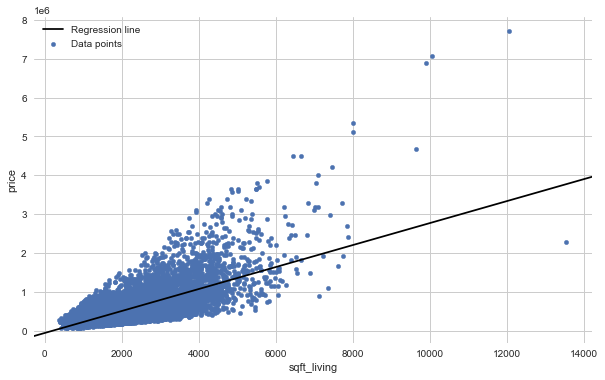

In [ ]:
# plotting the regression line
fig, ax = plt.subplots(figsize=(10,6))
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

# Metric for Evaluation

In [ ]:
# Calculate the mean absolute error of the baseline model
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

173788.4850613264

In [ ]:
#calculating the RMSE   for the baseline model
rmse = np.sqrt(baseline_mae)
rmse

416.87946106917576

The model is off by about 174670

* Try working with more independent varriables 

In [ ]:
# set the predictor variables
X = data_1[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', "grade","condition","yr_renovated","yr_built"]]

# add a constant to the predictor variables
X = sm.add_constant(X)

# set the response variable
y = data_1['price']

# create the model
model = sm.OLS(y, X)
model_results = model.fit()

# print the model summary
print(model_results.summary())

MissingDataError: exog contains inf or nans

According to the output, our multiple linear regression model has an R-squared value of 0.638, indicating that approximately 63.4% of the variance in home prices can be explained by the predictor variables included in the model.

The coefficients of the predictor variables indicate the impact of each variable on the home price.
 1. Waterfront property: Homes located on the waterfront have an average increase of $761,500 in value compared to homes that are not on the waterfront.
 2. Square footage of living area: An increase in one square foot of living area leads to an increase of $196.33 in home price.
 3. Grade: Higher-grade properties have an average increase of $120,400 in value compared to lower-grade properties.
 4. Number of bathrooms: Each additional bathroom adds an average of $51,180 to the home price
 5. Bedrooms: Each additional bedroom adds an average of $48,080 to the home price

The p-values of the coefficients indicate the statistical significance of the impact of each variable on the home price. All the predictor variables in our model have a p-value of 0.000, indicating that they are statistically significant in predicting the home price.

In [ ]:
# calculating the MAE
other_mae = mean_absolute_error(y, model_results.predict(sm.add_constant(X)))
other_mae

166084.0969749707

In [ ]:
#Calculating the RMSE
rmse = np.sqrt(other_mae)
rmse

407.53416663510643

The MAE is lower compared to the baseline_model

Generally, a lower value of MAE indicates that the model is making better predictions. However, what is considered a good or acceptable value of MAE can vary depending on the specific problem being addressed, the scale of the target variable, and other factors

* # Working with multiple independent varriables

---

# correlation matrix


A correlation matrix is a table showing correlation coefficients between variables

We will now analyse the correlation matrix to determine which variables to keep in our model. Along with our correlation matrix, we will also be looking at the VIF (Variance Inflation Factor) of each variable. The VIF is a measure of how much the variance of an estimated regression coefficient increases if the independent variables are correlated.

We are aiming to ensure that a correlation coefficient is less than 0.6 and a VIF is less than 5. This is because a correlation coefficient of 0.6 or higher indicates that the variables are highly correlated. A VIF of 5 or higher indicates that the variables are highly correlated.

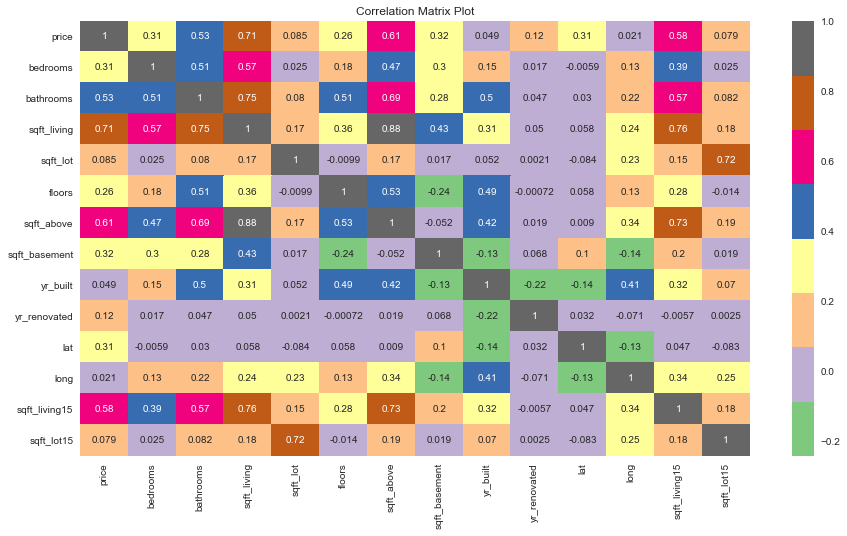

In [ ]:
data_corr = data.drop(['id','zipcode'], axis=1)# we drop the id and zipcode column
plt.figure(figsize=(15,8))
sns.heatmap(data_corr.corr(), annot=True, cmap='Accent')
plt.title('Correlation Matrix Plot')
plt.show()

# interpretation

* From the above correlation matrix plot, We can see that numerical variables that have a higher correlation with price are; sqft_living, sqft_above, sqft_living15,bathrooms, and bedrooms.

* We can also see that the variables with a weak positive correletion to price are sqft_lot, sqft_lot15, and yr_built.


>#

In [ ]:
data['total_rooms'] = data['bedrooms'] + data['bathrooms']

In [ ]:

# Encode categorical variables as dummy variables
data = pd.get_dummies(data, columns=['waterfront', 'view', 'condition', 'grade'])

KeyError: "None of [Index(['waterfront', 'view', 'condition', 'grade'], dtype='object')] are in the [columns]"

## Analysying trends in house prices over time (time series analysis) and predict future prices.

In [ ]:
data_2 = data.copy()

In [ ]:
# Set the date column as the index
data_2 = data_2.set_index('date')

In [ ]:
# Resample the data to monthly frequency
data_monthly = data_2.resample('M').mean()

In [ ]:
data_monthly.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,
2014-05-31,4.701205e+09,547644.591013,3.386900,2.138995,2104.560548,15329.055598,1.490861,1788.069307,316.521368,1970.507997,117.176695,98078.322925,47.568265,-122.215318,2000.498858,12716.558264
2014-06-30,4.594381e+09,557425.136943,3.437580,2.164650,2139.772611,15219.347771,1.514650,1837.338217,303.367320,1970.794904,72.361783,98078.617197,47.564551,-122.213238,2035.994268,13388.848408
2014-07-31,4.543379e+09,539947.788027,3.379352,2.140348,2116.738546,14646.560782,1.512828,1824.114844,291.062305,1971.753818,89.118509,98074.000611,47.556282,-122.203032,2030.573610,13299.398290
2014-08-31,4.603071e+09,538253.176966,3.372893,2.143083,2101.985253,14272.971910,1.512289,1823.144663,276.830824,1972.950140,84.096910,98076.836376,47.562934,-122.209002,2007.752809,12613.021770
2014-09-30,4.426375e+09,533644.408353,3.352668,2.129737,2077.260634,14570.285383,1.488786,1776.318639,299.575419,1970.230472,95.784996,98077.845321,47.563598,-122.214916,1987.939675,11388.989946


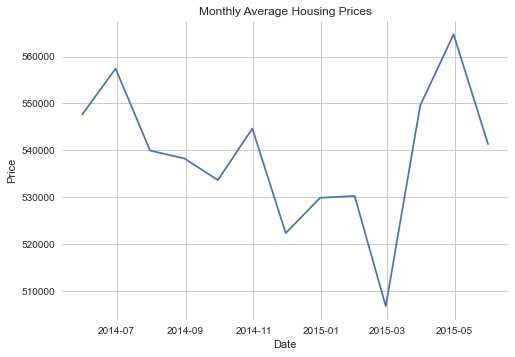

In [ ]:
#line plot of the time series data
plt.plot(data_monthly.index, data_monthly['price'])

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Average Housing Prices')
plt.show()

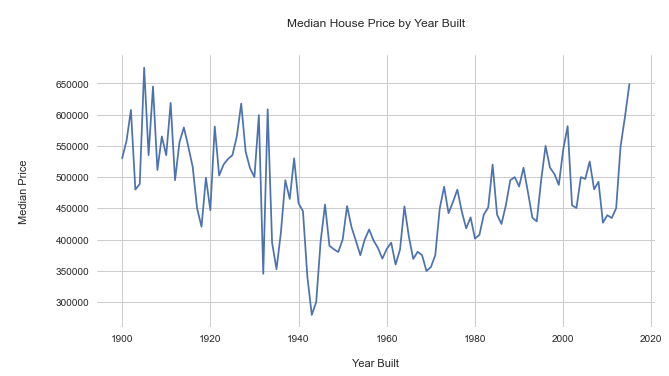

In [ ]:
#a time series plot of median house prices by year built
plt.figure(figsize=(10,5))
data_2.groupby('yr_built')['price'].median().plot()
plt.xlabel('''
Year Built''')
plt.ylabel("""
Median Price

""")
plt.title('''
Median House Price by Year Built

''')
plt.show()

In [ ]:
# 'yr_renovated' to datetime format
data_2['yr_renovated'] = pd.to_datetime(data_2['yr_renovated'], format='%Y', errors='coerce')

In [ ]:
# Convert 'yr_renovated' to datetime format and extract year
data_2['yr_renovated'] = pd.to_datetime(data_2['yr_renovated'], format='%Y', errors='coerce').dt.year
data_2.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-12-09,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000
2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,NaN,98074,47.6168,-122.045,1800,7503
2014-05-12,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,NaN,98053,47.6561,-122.005,4760,101930
2014-06-27,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,7 Average,1715,NaN,1995,NaN,98003,47.3097,-122.327,2238,6819


In [ ]:
data_2['yr_renovated'] = data_2['yr_renovated'].astype('Int64').fillna(0)
data_2['yr_renovated']

date
2014-12-09    1991
2014-12-09       0
2015-02-18       0
2014-05-12       0
2014-06-27       0
              ... 
2015-02-19       0
2014-05-21       0
2015-02-23       0
2014-06-23       0
2014-10-15       0
Name: yr_renovated, Length: 15762, dtype: Int64

In [ ]:
# a new feature 'renovated' indicating whether a property has been renovated or not
data_2['renovated'] = (data_2['yr_renovated'] > 0).astype(int)

In [ ]:
# Extracts the number of years since the last renovation
data_2['years_since_renovated'] = pd.Timestamp.now().year - data['yr_renovated']
data_2['years_since_renovated'].fillna(0, inplace=True)

In [ ]:
data_2['years_since_renovated'] = np.where(data_2['yr_renovated']==0, 0, 2023 - data_2['yr_renovated'])
data_2.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,years_since_renovated
date,,,,,,,,,,,,,,,,,,,,,
2014-12-09,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,1,32
2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,0,0
2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,0,0
2014-05-12,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,...,1530.0,2001,0,98053,47.6561,-122.005,4760,101930,0,0
2014-06-27,1321400060,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,...,NaN,1995,0,98003,47.3097,-122.327,2238,6819,0,0


In [ ]:
# separates the price data for renovated and non-renovated homes
renovated_prices = data_2[data_2['renovated'] == 1]['price']
non_renovated_prices = data_2[data_2['renovated'] == 0]['price']

# performs independent two sample t-test
t_stat, p_val = stats.ttest_ind(renovated_prices, non_renovated_prices, equal_var=False)

# results
print('Renovated mean price:', renovated_prices.mean())
print('Non-renovated mean price:', non_renovated_prices.mean())
print('t-statistic:', t_stat)
print('p-value:', p_val)
stat_sig = p_val < 0.05
print("As the p-value is", p_val, "we reject the null hypothesis that there is no difference in the mean price of renovated and non-renovated homes.")


Renovated mean price: 760872.0568356374
Non-renovated mean price: 531858.4881874132
t-statistic: 9.110673651757127
p-value: 9.425782918283655e-19
As the p-value is 9.425782918283655e-19 we reject the null hypothesis that there is no difference in the mean price of renovated and non-renovated homes.


Based on the t-test, we have evidence to believe that there is a difference between the mean price of houses that are renovated and non-renovated properties.

### Baseline model

In [ ]:
X = data_2[['renovated']]
y = data_2['price']

# Add constant to X
X = sm.add_constant(X)

# Create and fit OLS model
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     239.8
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           1.06e-53
Time:                        08:51:26   Log-Likelihood:            -2.2443e+05
No. Observations:               15762   AIC:                         4.489e+05
Df Residuals:                   15760   BIC:                         4.489e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.319e+05   3005.343    176.971      0.000    5.26e+05    5.38e+05
renovated    2.29e+05   1.48e+04     15.486      0.000       2e+05    2.58e+05
==============================================================================
Omnibus:                    14328.284   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           944085.223
Skew:                           4.163   Prob(JB):                         0.00
Kurtosis:                      39.989   Cond. No.                         5.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>Interpretation of these results</b>

* Based on the OLS regression results, the model's <i>R-squared value</i> is 0.015, indicating that only 1.5% of the variation in home prices can be explained by the renovated feature alone.

* The <i>coefficient</i> for renovated is 2.29e+05, indicating that, on average, renovated homes have a price that is $229,000 higher than non-renovated homes.

* The <i>F-statistic value</i> of 239.8 and its corresponding p-value of 1.06e-53 suggest that the model is statistically significant.

In [ ]:
print(data_2['years_since_renovated'].dtype)

object


In [ ]:
data_2['years_since_renovated'] = pd.to_numeric(data_2['years_since_renovated'], errors='coerce')

In [ ]:
print(data_2['years_since_renovated'].dtype)

int64


In [ ]:
# Creates a simple linear regression model: years since renovated
X = sm.add_constant(data_2['years_since_renovated'])
y = data_2['price']
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     117.4
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           2.90e-27
Time:                        08:51:26   Log-Likelihood:            -2.2449e+05
No. Observations:               15762   AIC:                         4.490e+05
Df Residuals:                   15760   BIC:                         4.490e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.356e+

In [ ]:
# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_2['years_since_renovated'], data_2['price'], test_size=0.2)

# Fit linear regression model and make predictions
y_pred = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train).predict(X_test.values.reshape(-1, 1))


## Identifying undervalued properties (outlier detection) and recommend better prices that will help the agency maximise on profits.

In [ ]:
data_3 = data.copy()

In order to identify a promising categorical predictor, we need to create bar graphs for each of these categorical features.

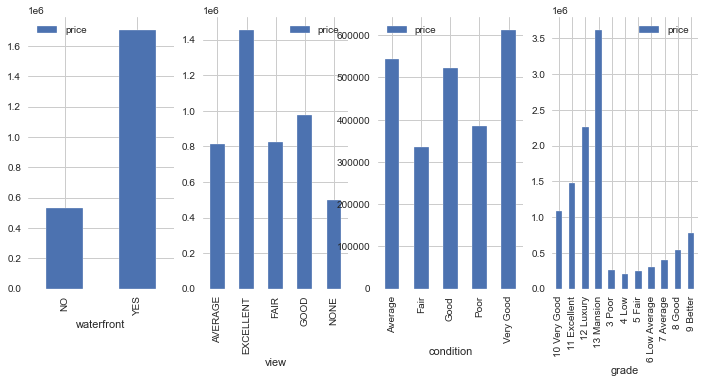

In [ ]:
categorical_features = data.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))

for index, feature in enumerate(categorical_features):
    data.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

Identifying outliers in our dataset. 

In [ ]:
one_hot = pd.get_dummies(data['condition'], drop_first=True) 
df_1 = data.drop('condition',axis = 1)
df_1 = data.join(one_hot)

In [ ]:
count = 0
price_outliers = []
mean = np.mean(data['price'])
max_distance = np.std(data['price'])*3 

# create a new empty DataFrame to store the outliers
data_outliers = pd.DataFrame(columns=data.columns)

for idx, row in data['price'].T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        # append the outlier row to the data_outliers DataFrame
        data_outliers = data_outliers.append(data.loc[idx])
        # add the index of the outlier row to the price_outliers list (if needed)
        price_outliers.append(idx)

# print the count of outliers found
print(f"{count} outliers found")

282 outliers found


In [ ]:
data_outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,NO,EXCELLENT,...,9 Better,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
153,7855801670,2015-04-01,2250000.0,4,3.25,5180,19850,2.0,NO,GOOD,...,12 Luxury,3540,1640.0,2006,0.0,98006,47.5620,-122.162,3160,9750
246,2025069065,2014-09-29,2400000.0,4,2.50,3650,8354,1.0,YES,EXCELLENT,...,9 Better,1830,1820.0,2000,0.0,98074,47.6338,-122.072,3120,18841
282,7424700045,2015-05-13,2050000.0,5,3.00,3830,8480,2.0,NO,FAIR,...,9 Better,2630,1200.0,1905,1994.0,98122,47.6166,-122.287,3050,7556
300,3225069065,2014-06-24,3080000.0,4,5.00,4550,18641,1.0,YES,EXCELLENT,...,10 Very Good,2600,1950.0,2002,0.0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21367,644000115,2014-09-23,1770000.0,4,3.25,3980,10249,2.0,NO,NONE,...,10 Very Good,3980,0.0,2011,0.0,98004,47.5873,-122.196,2450,10912
21457,8085400586,2014-11-01,1750000.0,4,2.75,3560,8975,2.0,NO,NONE,...,10 Very Good,3560,0.0,2014,0.0,98004,47.6322,-122.209,3440,12825
21524,715010530,2015-01-13,1880000.0,5,3.50,4410,13000,2.0,NO,GOOD,...,10 Very Good,2920,1490.0,2014,0.0,98006,47.5382,-122.111,5790,12969
21552,524059330,2015-01-30,1700000.0,4,3.50,3830,8963,2.0,NO,NONE,...,10 Very Good,3120,710.0,2014,0.0,98004,47.5990,-122.197,2190,10777
